<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Taha Alimohammadi

**Student ID**: Taha Alimohammadi


# 📈 **Linear Regression**
#### **What is linear regression used for?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# **Making Predictions with Linear Regression**

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. Imagine we are predicting y from  x. Our linear regression model representation for this problem would be:

**y = B0 + B1 * x1**


Where B0 is the bias coefficient and B1 is the coefficient for x column. We use a learning technique to find a good set of coefficient values. Once found, we can plug in different height values to predict y.

you are only allowed to use these libraries:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression


Load a real estate dataset, display its first few rows, examine its shape, check its data types, compute the correlations between its features, and visualize these correlations using a heatmap?

In [3]:
df = pd.read_csv("Real estate.csv")

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

In [5]:
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(414, 8)


In [6]:
print("\nData types of the dataset:")
print(df.dtypes)


Data types of the dataset:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [7]:
print("\nCorrelation matrix:")
print(df.corr())


Correlation matrix:
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores          

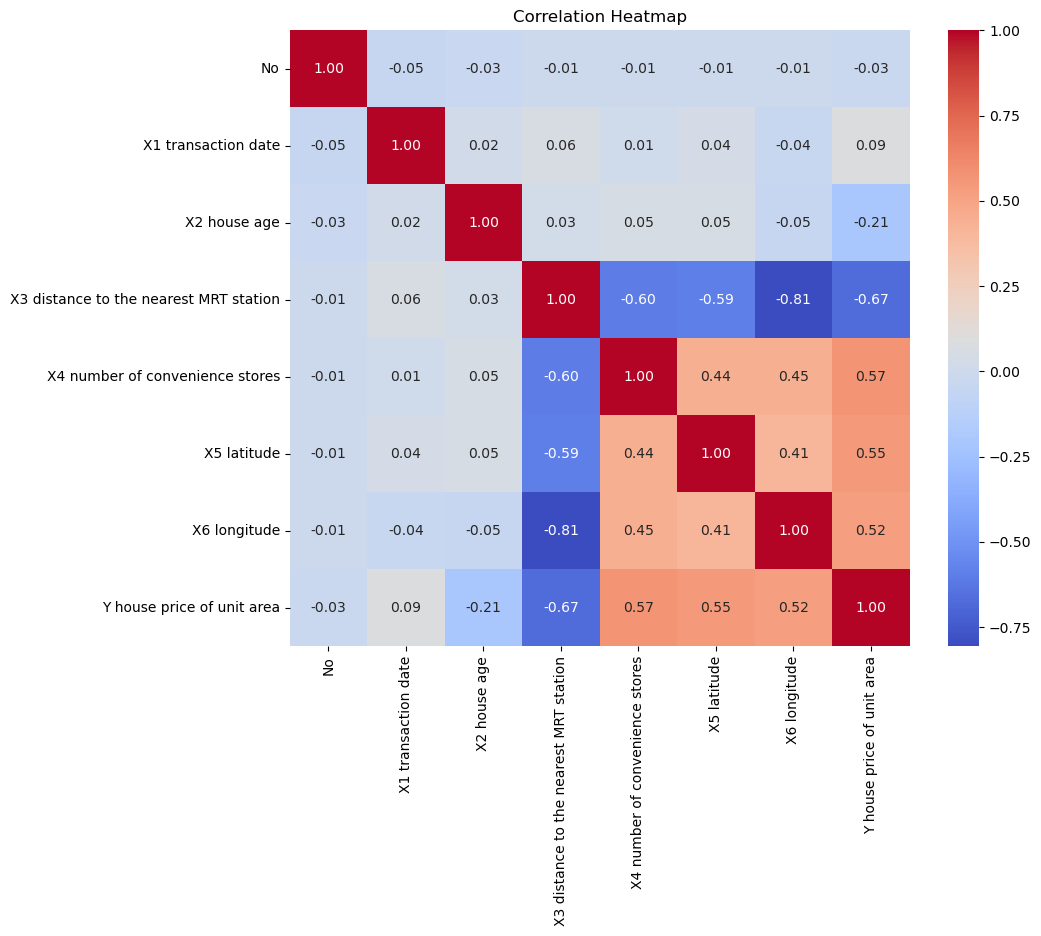

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Exploratory Data Analysis (EDA)

Create pairwise scatter plots for all the features in a real estate dataset, and briefly explain your undrestanding of this plot.

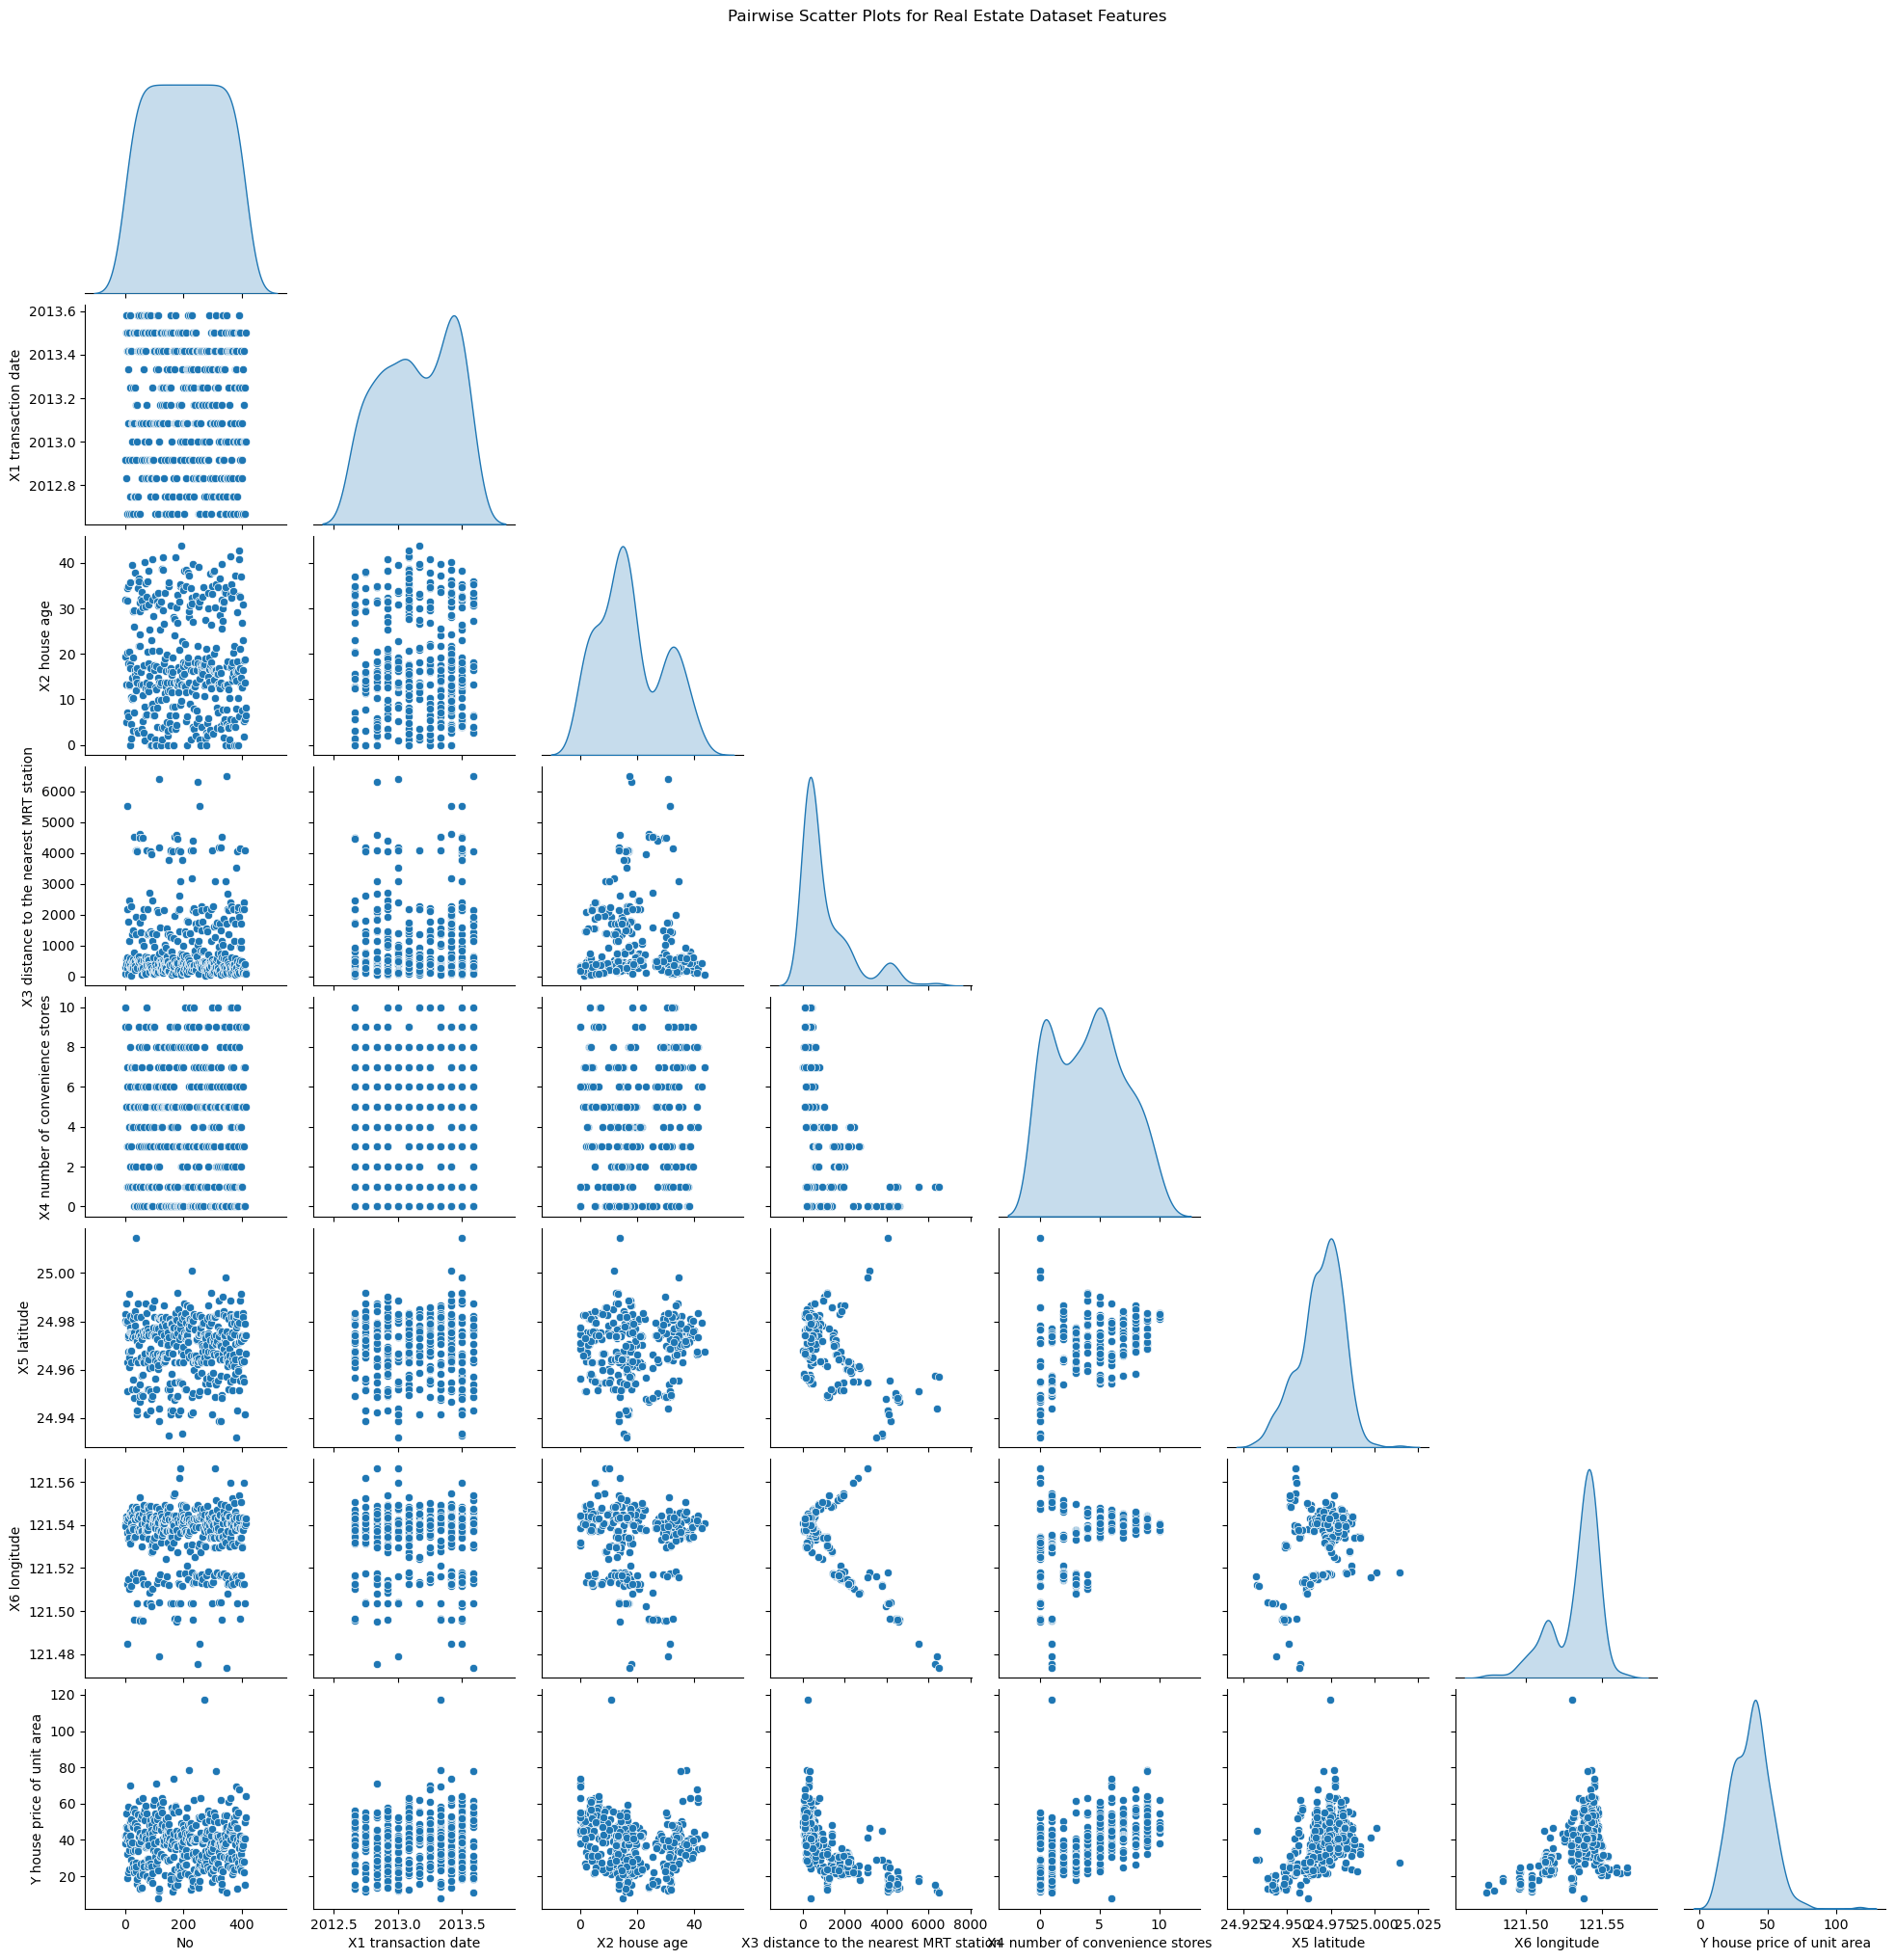

In [9]:
df = df.select_dtypes(include=[np.number]).dropna()

sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Scatter Plots for Real Estate Dataset Features", y=1.02)
plt.show()

Amswer:

Training a Linear Regression Model


How would you extract the features and the target variable from a real estate dataset, excluding the house price?

Answer: typically follow these steps:

Steps:
Load the Dataset:
Use pandas to load your dataset into a DataFrame.

Identify the Target Variable:
The target variable (e.g., house_price) is the column you aim to predict.

Exclude the Target Variable from Features:
Use pandas to drop the target variable column from the dataset to create the feature set.

Separate Features and Target Variable:
Assign the remaining columns to X (features) and the target variable column to y.

If X represents all the features in the dataset except for the house price and y represents the number of convenience stores from the dataset ,display their shapes

In [11]:
X = df.drop(["No","Y house price of unit area"], axis = 1)
y = df["X4 number of convenience stores"]
print("Shape of X is", X.shape)
print("Shape of y is", y.shape)

Shape of X is (414, 6)
Shape of y is (414,)


Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(331, 6)

In [14]:
X_test.shape

(83, 6)

Now, train a linear regression model using the training data X_train and y_train.

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

Show the coefficients of the trained linear regression model and present them in a DataFrame with the corresponding feature names

In [20]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
fc = pd.DataFrame([model.coef_], columns = df.drop(["No","Y house price of unit area"], axis = 1).columns)
fc

Model Coefficients: [-1.31008383e-16 -2.90580845e-16 -6.67738045e-18  1.00000000e+00
  3.30029984e-15 -5.32095631e-15]
Model Intercept: 8.384404281969182e-13


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.310084e-16,-2.905808e-16,-6.677380e-18,1.0,3.300300e-15,-5.320956e-15


How would you use our trained linear regression model to make predictions on the test data X_test?

In [21]:
y_pred = model.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for a linear regression model's predictions, and find the mean value of the 'X4 number of convenience stores' feature from the dataset and print them.

In [29]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mean_convenience_stores = df['X4 number of convenience stores'].mean()

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean value of 'X4 number of convenience stores':", mean_convenience_stores)

Mean Absolute Error (MAE): 7.59167935956062e-15
Mean Squared Error (MSE): 1.1709081005762063e-28
Root Mean Squared Error (RMSE): 1.082085070859129e-14
Mean value of 'X4 number of convenience stores': 4.094202898550725


## Residual Histogram

Often for Linear Regression it is a good idea to separately evaluate residuals $$(y-\hat{y})$$ and not just calculate performance metrics (e.g. RMSE).

Let's explore why this is important...

The residual erors should be random and close to a normal distribution.

Compute the residuals from the test predictions and visualize their distribution using both a kernel density estimation (KDE) plot and a seaborn histogram with a KDE overlay.

C:\Users\Surface Taha\AppData\Local\Temp\ipykernel_10556\3637222236.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_residual, shade=True, color='blue', label='KDE')


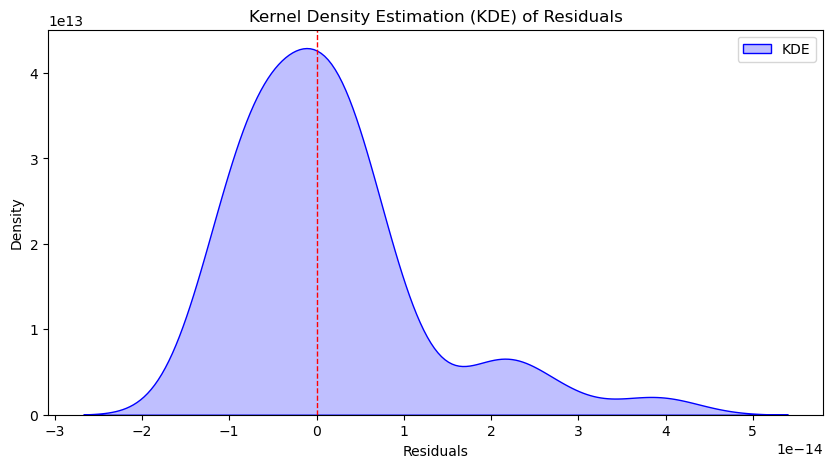

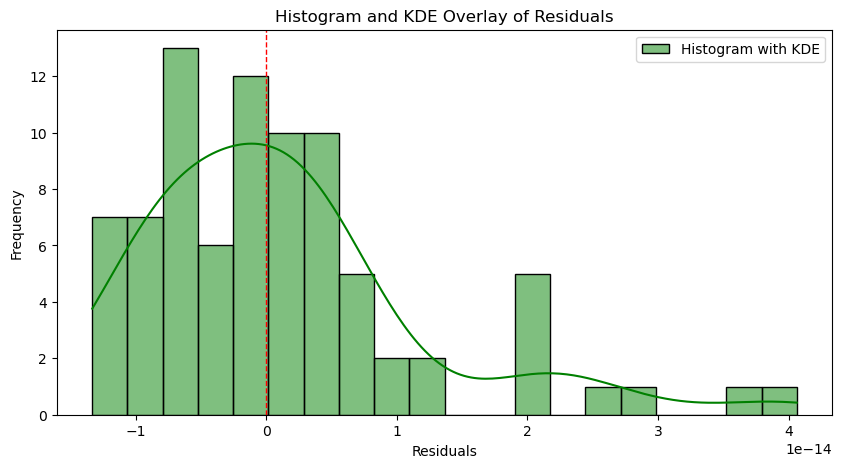

In [31]:
test_residual= y_test - y_pred

#KDE
plt.figure(figsize=(10, 5))
sns.kdeplot(test_residual, shade=True, color='blue', label='KDE')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title('Kernel Density Estimation (KDE) of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

#histo
plt.figure(figsize=(10, 5))
sns.histplot(test_residual, kde=True, bins=20, color='green', label='Histogram with KDE')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title('Histogram and KDE Overlay of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* **Residual plot shows residual error VS. true y value.**

Create a scatter plot to visualize the relationship between the true values (y_test) and the residuals, and add a horizontal line at y=0 to indicate where the residuals should ideally fall

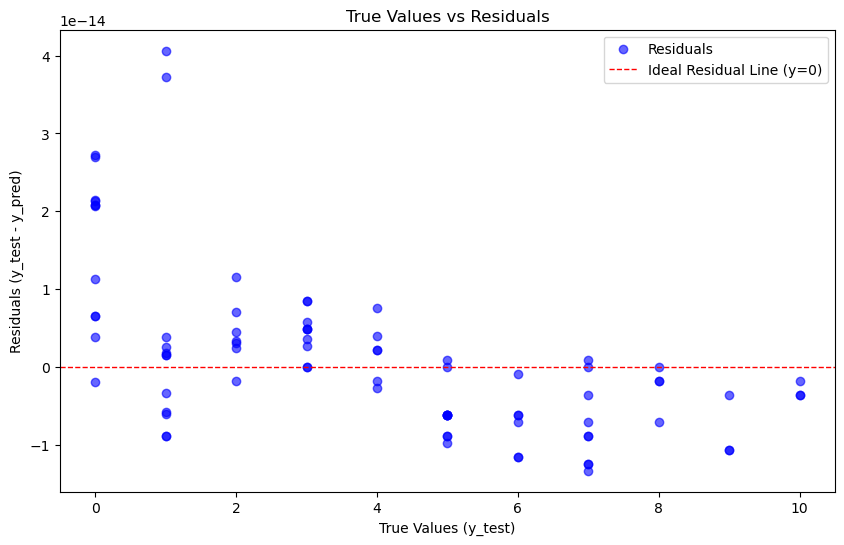

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_residual, color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Ideal Residual Line (y=0)')
plt.title('True Values vs Residuals')
plt.xlabel('True Values (y_test)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.legend()
plt.show()

* **Residualplot showing a clear pattern, indicating Linear Regression no valid!**